In [2]:
#Pandas == DataFrame & Manipulation
#Seaborn & Matplot == Graphique
#Numpy == Fonction mathématique pour matrice & tableau

#Nettoyer code & commenter pour le storytelling - analyse

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importation CSV

data_population = pd.read_csv("population.csv")
data_aide_ali = pd.read_csv("aide_alimentaire.csv")
data_dispo_ali = pd.read_csv("dispo_alimentaire.csv")
data_sous_nutri = pd.read_csv("sous_nutrition.csv")
data_cereale = pd.read_csv("cereale.csv")

# VERIFICATION IMPORTATION

In [3]:
data_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [4]:
data_aide_ali.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [5]:
data_dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [6]:
data_sous_nutri.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


# TRAITEMENT

In [7]:
#Drop les lignes où la valeur est null
valeur_here = data_sous_nutri.dropna(inplace=True)

In [8]:
#Mise en forme des années dans les data Sous nutrition
data_sous_nutri.loc[data_sous_nutri['Année'] == '2016-2018','Année'] = 2017

In [9]:
#Transforme la population en sous-nutrition de <0.1 à 0.1
data_sous_nutri.loc[data_sous_nutri['Valeur'] == '<0.1','Valeur'] = 0.1

In [10]:
#Changement de type pour bien mettre tout en float
data_sous_nutri['Valeur'] = data_sous_nutri['Valeur'].astype('float')

In [11]:
#Suppression des données vides
data_sous_nutri.dropna

<bound method DataFrame.dropna of              Zone      Année  Valeur
0     Afghanistan  2012-2014     8.6
1     Afghanistan  2013-2015     8.8
2     Afghanistan  2014-2016     8.9
3     Afghanistan  2015-2017     9.7
4     Afghanistan       2017    10.5
...           ...        ...     ...
1195     Viet Nam  2013-2015     8.3
1196     Viet Nam  2014-2016     7.6
1197     Viet Nam  2015-2017     7.1
1198     Viet Nam       2017     6.5
1199     Viet Nam  2017-2019     6.1

[624 rows x 3 columns]>

In [12]:
#data_sous_nutri['Valeur'] = data_sous_nutri['Valeur']*1000 -> convertion en milliers
data_population['Valeur'] = data_population['Valeur']/1000 #Convertion en millions


In [13]:
#Remplacement des NaN par 0

data_dispo_ali = data_dispo_ali.fillna(0)

In [14]:
#Renomme "Bénéficiaire" en zone pour homogénéiser 
data_aide_ali = data_aide_ali.rename(columns = {'Pays bénéficiaire': 'Zone', 'Année': 'Année', 'Produit' : 'Produit', 'Valeur' :'Valeur'})
data_population = data_population.rename(columns = {'Zone': 'Zone', 'Année': 'Année', 'Valeur' : 'Population'})

# REQUÊTE DE MARK

## REQUETE 1

In [15]:
#Faire un merge à la place pour les pays avec des données absentes
#Dataframe Sous-nutrition pour 2017
Sous_nutri_2017 = data_sous_nutri.loc[data_sous_nutri['Année']==2017,:] #Datafram Sous-nutrition pour 2017

Sous_nutri_2017['Valeur'].astype('float')

4       10.5
10       3.1
16       0.1
22       1.3
40       5.8
        ... 
1156     0.2
1174     1.5
1186     0.1
1192     8.0
1198     6.5
Name: Valeur, Length: 104, dtype: float64

In [16]:
#Dataframe de la population pour 2017
Population_2017 = data_population.loc[data_population['Année']==2017,:]

In [17]:
#Somme d'habitants en sous nutri en millions
Total_sous_nutri_2017 = np.sum(Sous_nutri_2017['Valeur'])

In [18]:
#Somme d'habitant total en milliers / conversion en millions
Total_population_2017 = np.sum(Population_2017['Population'])

In [19]:
#Calcul pourcentage
pourc_sous_nutri_2017 = round((Total_sous_nutri_2017*100/Total_population_2017),2)
print("Pourcentage de la population en état de sous-nutrition : ",pourc_sous_nutri_2017,"%")

Pourcentage de la population en état de sous-nutrition :  7.12 %


## REQUETE 2

In [20]:
# ATTENTION : multiplier le nombre de calories par le nombre d'habitant pour chaque produit

In [21]:
Dispo = data_dispo_ali.groupby('Zone').sum()[['Disponibilité alimentaire (Kcal/personne/jour)']]

In [22]:
#Jointure de la table Population_2017 & data_dispo_ali
Dispo_alim_pays = pd.merge(Population_2017, Dispo, how="left", on="Zone")

In [23]:
#Convertion calorie en kcal
Calorie = 2400*365

#Calcul de la population mondiale en 2017
Population_2017_tt = np.sum(Dispo_alim_pays['Population'])

Somme_dispo = (Dispo_alim_pays['Population']*Dispo_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)'])*365
print(np.sum(Somme_dispo))

7635429388.975815


In [24]:
Perso_theo = np.sum(Somme_dispo)/Calorie
print("Nombre de personne théorique qui peuvent être nourris :", round(Perso_theo)) #rajouter l'unité

pourcentage = Perso_theo/Population_2017_tt*100
print(round(pourcentage),"% de la population mondiale")

Nombre de personne théorique qui peuvent être nourris : 8716
115 % de la population mondiale


## REQUÊTE 3

In [25]:
Dispo_alim_veg = data_dispo_ali.loc[data_dispo_ali["Origine"]=="vegetale",:]

In [26]:
Dispo_veg = Dispo_alim_veg.groupby('Zone').sum()[['Disponibilité alimentaire (Kcal/personne/jour)']]

In [27]:
Dispo_alim_pays_veg = pd.merge(Population_2017, Dispo_veg, how="left", on="Zone")

In [28]:
#Convertion calorie en kcal
Calorie = 2400*365

#Calcul de la population mondiale en 2017
Population_2017_tt = np.sum(Dispo_alim_pays['Population'])

Somme_dispo_veg = (Dispo_alim_pays_veg['Population']*Dispo_alim_pays_veg['Disponibilité alimentaire (Kcal/personne/jour)'])*365

In [29]:
Perso_theo_veg = np.sum(Somme_dispo_veg)/Calorie
print("Nombre de personne théorique qui peuvent être nourris (Végétaux) :", round(Perso_theo_veg))

pourcentage_veg = Perso_theo_veg/Population_2017_tt*100
print(round(pourcentage_veg),"% de la population mondiale")

Nombre de personne théorique qui peuvent être nourris (Végétaux) : 7192
95 % de la population mondiale


## REQUÊTE 4

In [30]:
#Dispo intérieur = production + import - export + variation de stock
#Dispo intérieur utilisation = Nouritture + pertes + autres utilisations + utilisation animaux + semences
#Variable exprimée en milliers de tonnes

In [31]:
Dispo_alim = np.sum(data_dispo_ali['Disponibilité intérieure'])
Nourriture = np.sum(data_dispo_ali['Nourriture'])
pertes = np.sum(data_dispo_ali['Pertes'])
animaux = np.sum(data_dispo_ali['Aliments pour animaux'])
aut_uti = np.sum(data_dispo_ali['Autres Utilisations'])
Semences = np.sum(data_dispo_ali['Semences'])
traitement = np.sum(data_dispo_ali['Traitement'])

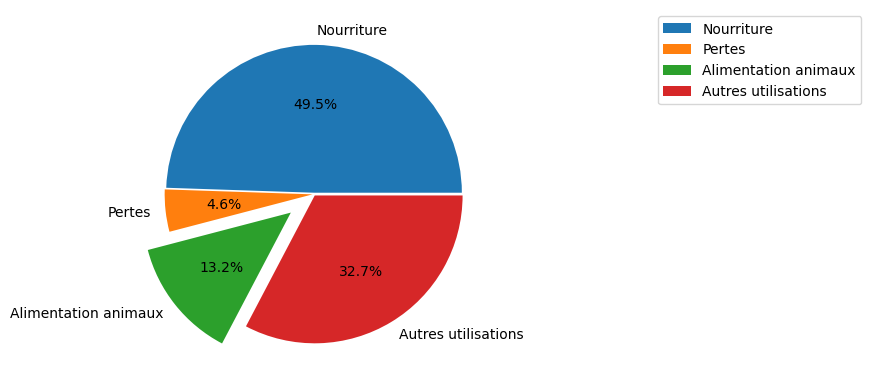

Autre utilisations comprends les catégories suivantes : Autres utilisations 8.78 %, semences 1.57 %, traitements 22.38 %


In [32]:
part_n = round(Nourriture/Dispo_alim*100,2)
part_p = round(pertes/Dispo_alim*100,2)
part_a = round(animaux/Dispo_alim*100,2)
part_at = round(aut_uti/Dispo_alim*100,2)
part_s = round(Semences/Dispo_alim*100,2)
part_t = round(traitement/Dispo_alim*100,2)

part_autre = part_t + part_s + part_at

#Création de graphique secteur
values = [part_n,part_p,part_a,part_autre]
labels = ['Nourriture', 'Pertes', 'Alimentation animaux','Autres utilisations']
myexplode = [0.01, 0.01, 0.2, 0.01]

plt.pie(values, labels = labels,explode = myexplode,autopct = '%1.1f%%')
plt.legend(bbox_to_anchor = (2, 1), loc = 'upper right', prop = {'size': 10})
plt.show() 

print("Autre utilisations comprends les catégories suivantes : Autres utilisations",part_at,"%, semences",part_s,"%, traitements",part_t,"%")

# INTERROGATION JULIEN

## Utilisation des céréales

#### Liste de céréale 

In [33]:
produit = data_cereale['Produit']

In [34]:
#Suppression des doublons et reset de l'idnex
produit = produit.drop_duplicates()
produit = produit.reset_index(drop=True)
print(produit)

0       Blé et produits
1       Riz et produits
2      Orge et produits
3      Maïs et produits
4    Seigle et produits
5                Avoine
6    Millet et produits
7    Sorgho et produits
8      Céréales, Autres
Name: Produit, dtype: object


#### Part céréale V1

In [35]:
cereale_data = data_dispo_ali.groupby('Produit').sum()

In [36]:
#Localisation des produits appartenant à la liste
Dispo_ble = cereale_data.loc[cereale_data.index == "Blé"]
Dispo_riz = cereale_data.loc[cereale_data.index == "Riz (Eq Blanchi)"]
Dispo_avoine = cereale_data.loc[cereale_data.index == "Avoine"]
Dispo_orge = cereale_data.loc[cereale_data.index == "Orge"]
Dispo_mais = cereale_data.loc[cereale_data.index == "Maïs"]
Dispo_seigle = cereale_data.loc[cereale_data.index == "Seigle"]
Dispo_Millet = cereale_data.loc[cereale_data.index == "Millet"]
Dispo_Sorgho = cereale_data.loc[cereale_data.index == "Sorgho"]
Dispo_autre = cereale_data.loc[cereale_data.index == "Céréales, Autres"]

In [37]:
Data_cer = pd.concat([Dispo_ble, Dispo_riz,Dispo_avoine,Dispo_orge,Dispo_mais,Dispo_seigle,Dispo_Millet,Dispo_Sorgho,Dispo_autre])

In [38]:
#Calcul pour avoir la totalité de chaque variable 
Dispo_alim = np.sum(Data_cer['Disponibilité intérieure'])
Nourriture = np.sum(Data_cer['Nourriture'])
pertes = np.sum(Data_cer['Pertes'])
animaux = np.sum(Data_cer['Aliments pour animaux'])
aut_uti = np.sum(Data_cer['Autres Utilisations'])
Semences = np.sum(Data_cer['Semences'])
traitement = np.sum(Data_cer['Traitement'])
prod = np.sum(Data_cer['Production'])

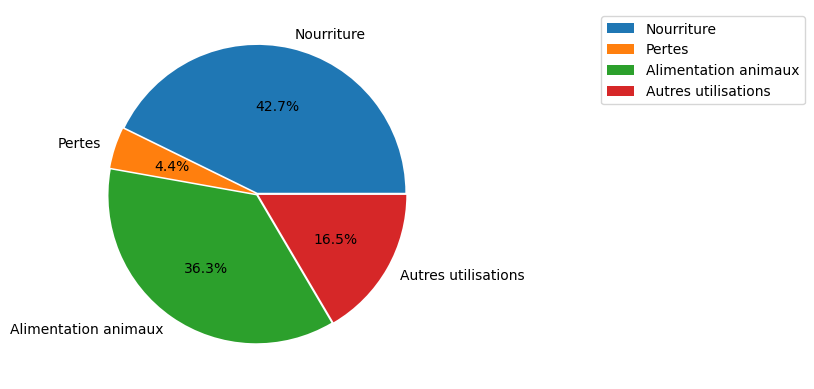

Autre utilisations comprends les catégories suivantes : Autres utilisations 9.75 %, semences 2.85 %, traitements 3.93 %


In [39]:
#Calcul des différentes répartitions pour la disponibilité intérieure
part_n = round(Nourriture/Dispo_alim*100,2)
part_p = round(pertes/Dispo_alim*100,2)
part_a = round(animaux/Dispo_alim*100,2)
part_at = round(aut_uti/Dispo_alim*100,2)
part_s = round(Semences/Dispo_alim*100,2)
part_t = round(traitement/Dispo_alim*100,2)

part_autre = part_t + part_s + part_at

values = [part_n,part_p,part_a,part_autre]
labels = ['Nourriture', 'Pertes', 'Alimentation animaux','Autres utilisations']
myexplode = [0.01, 0.01, 0.01, 0.01]

plt.pie(values, labels = labels,explode = myexplode,autopct = '%1.1f%%')
plt.legend(bbox_to_anchor = (2, 1), loc = 'upper right', prop = {'size': 10})
plt.show() 

print("Autre utilisations comprends les catégories suivantes : Autres utilisations",part_at,"%, semences",part_s,"%, traitements",part_t,"%")

#### Part céréales V2 

In [40]:
Dispo_cereale = cereale_data.loc[cereale_data.index.all() == "Blé et produits" or "Avoine" or "Riz et produits" or "Orge et produits" or "Maïs et produits" or "Seigle et produits" or "Millet et produits" or "Sorgho et produits" or "Céréales, Autres"]

In [41]:
#Calcul des différentes répartitions pour la disponibilité intérieure
part_animaux = round(Dispo_cereale['Aliments pour animaux']/Dispo_cereale['Disponibilité intérieure']*100,2)
part_nourriture =round(Dispo_cereale['Nourriture']/Dispo_cereale['Disponibilité intérieure']*100,2)
part_semence = round(Dispo_cereale['Semences']/Dispo_cereale['Disponibilité intérieure']*100,2)
part_traitement = round(Dispo_cereale['Traitement']/Dispo_cereale['Disponibilité intérieure']*100,2)
part_perte = round(Dispo_cereale['Pertes']/Dispo_cereale['Disponibilité intérieure']*100,2)
part_auti = round(Dispo_cereale['Autres Utilisations']/Dispo_cereale['Disponibilité intérieure']*100,2)

part_autre_ = part_traitement + part_semence + part_auti


print("part des animaux :", part_animaux)
print("part de la nourriture :", part_nourriture)

part des animaux : 69.43
part de la nourriture : 16.67


#### Création de graphique 

In [42]:
df = pd.DataFrame(data=[part_animaux,part_nourriture],columns=["Valeur"], index = ["Part Animaux","Part Nourriture"])

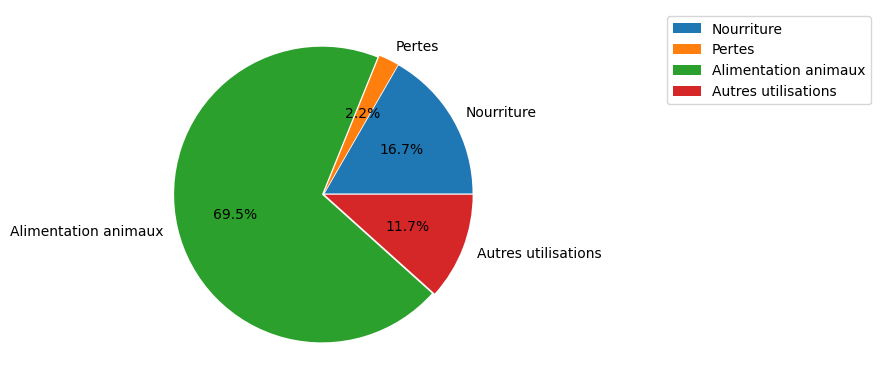

Autre utilisations comprends les catégories suivantes : Autres utilisations 9.75 %, semences 2.85 %, traitements 3.93 %


In [43]:
values = [part_nourriture,part_perte,part_animaux,part_autre_]
labels = ['Nourriture', 'Pertes', 'Alimentation animaux','Autres utilisations']
myexplode = [0.01, 0.01, 0.01, 0.01]

plt.pie(values, labels = labels,explode = myexplode,autopct = '%1.1f%%')
plt.legend(bbox_to_anchor = (2, 1), loc = 'upper right', prop = {'size': 10})
plt.show() 

print("Autre utilisations comprends les catégories suivantes : Autres utilisations",part_at,"%, semences",part_s,"%, traitements",part_t,"%")

### Exportation Manioc 

In [44]:
#Localisation des données pour les produits étant du Manioc
manioc = data_dispo_ali.loc[data_dispo_ali['Produit']=='Manioc']

In [45]:
#Localisation des lignes de Manioc pour la Thaïlande
Manioc_thai =manioc.loc[manioc['Zone']=='Thaïlande']

In [46]:
#Calcul de la part de l'exportation par rapport à la production de Manioc
export = Manioc_thai['Exportations - Quantité']/Manioc_thai['Production']*100
print("Part d'exportation du manioc :",round(export.iat[0],2))

Part d'exportation du manioc : 83.41


### Sous Nutrition de la Thaïlande 

In [47]:
#Localisation des données de sous nutrition pour l'année 2017
Sous_nutri_2017 = data_sous_nutri.loc[data_sous_nutri['Année']==2017,:]

In [48]:
#Jointure entre les fichiers Sous nutri 2017 et population 2017
Sous_nutri_2 = pd.merge(Sous_nutri_2017, Population_2017,how="left", on="Zone")

In [49]:
#Localisation des données de sous nutrition pour l'année 2017 pour la Thaïlande
Sous_nutri_2017_thai = Sous_nutri_2.loc[Sous_nutri_2['Zone']=="Thaïlande",:]

In [50]:
#calcul du pourcentage de sous nutrition
sous_nutri = Sous_nutri_2017_thai['Valeur'] / Sous_nutri_2017_thai['Population']*100
print("Sous-Nutrition en Thaîlande :",round(sous_nutri.iat[0],2),"%")
print(Sous_nutri_2017_thai['Valeur'])

Sous-Nutrition en Thaîlande : 8.96 %
95    6.2
Name: Valeur, dtype: float64


# REQUÊTE MELANIE

## Requête 1

### Traitement 

In [51]:
#Proportion de sous nutrition en 2017

In [52]:
Population_2017 = Population_2017.rename(columns = {'Zone': 'Zone', 'Année': 'Année', 'Valeur' : 'Population'})

In [53]:
#Localisation des données pour l'année 2017
Sous_nutri_2017 = data_sous_nutri.loc[data_sous_nutri['Année']==2017,:]

In [54]:
#Jointure de la Df Sous nutrition 2017 et population 2017
Sous_nutri_2 = pd.merge(Sous_nutri_2017, Population_2017,how="left", on="Zone")


In [55]:
Sous_nutri_2=Sous_nutri_2.assign(Pourcentage=Sous_nutri_2['Valeur']/Sous_nutri_2['Population']*100)
Sous_nutri_2 = Sous_nutri_2.sort_values(by = 'Pourcentage', ascending = False)

In [56]:
#Isolation des îles quand valeur sous nutrition > 0.11
head_sous_nutri = Sous_nutri_2.loc[Sous_nutri_2['Valeur']>0.11,:]

In [57]:
#Trie et arrondis
head_sous_nutri = head_sous_nutri.sort_values(by = 'Pourcentage', ascending = False)
head_sous_nutri = head_sous_nutri.head()
head_sous_nutri['Pourcentage'] = round(head_sous_nutri['Pourcentage'])


### Création Graphique 

In [58]:
#Analyse - pourquoi ils sont dans le top 5

Text(0, 0.5, 'Pays')

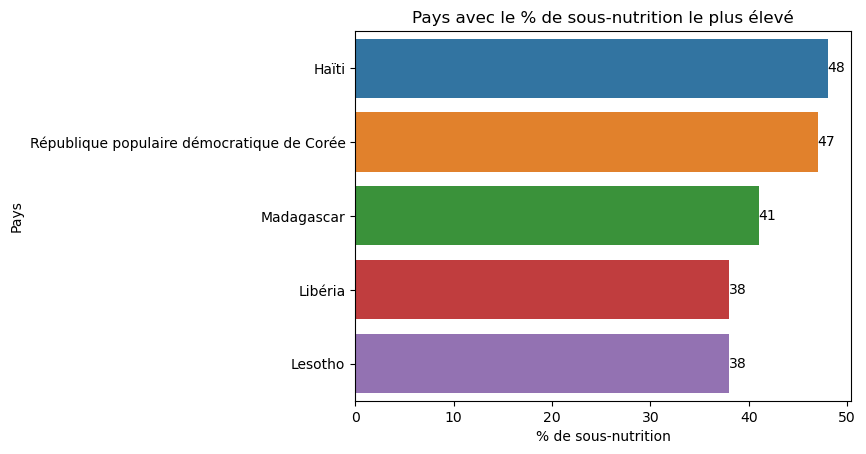

In [59]:
#Histogramme du top 5 du % de sous nutrition
graphique = sns.barplot(data=head_sous_nutri, x='Pourcentage', y='Zone', ci=None, estimator=np.sum)

#Ajout des étiquettes de valeur
graphique.bar_label(graphique.containers[0])

#Ajout du titre du graphique
plt.title("Pays avec le % de sous-nutrition le plus élevé")

#Modification du noms des axes
plt.xlabel('% de sous-nutrition')
plt.ylabel('Pays')


## Requête 2

### Traitement 

In [60]:
#Localisation pour 2013
data_aide_ali_date = data_aide_ali.loc[data_aide_ali['Année']>2013,:]

In [61]:
aide = data_aide_ali_date.groupby('Zone').sum()[['Valeur']]

In [62]:
head_aide_ali = aide.sort_values(by = 'Valeur', ascending = False)
head_aide_ali = head_aide_ali.head()


In [63]:
head_aide_ali['Valeur'] =head_aide_ali['Valeur']/1000

### Création graphique 

(0.0, 1500.0)

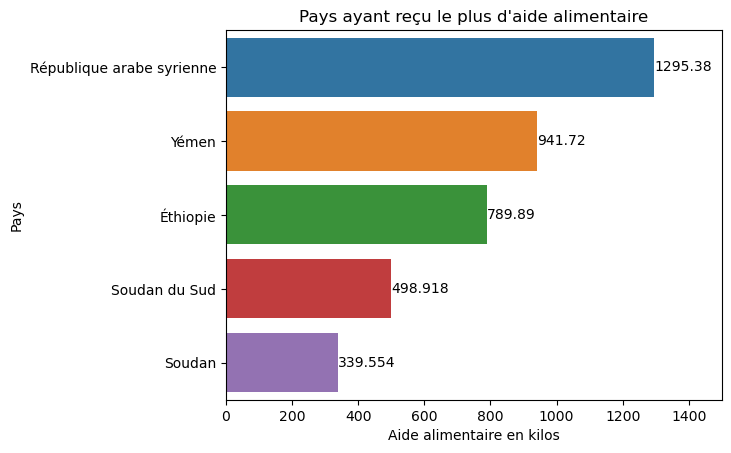

In [64]:
#graphique
graphique = sns.barplot(data=head_aide_ali, x='Valeur', y=head_aide_ali.index, ci=None, estimator=np.sum)

#Ajout du titre
plt.title("Pays ayant reçu le plus d'aide alimentaire")

#Modification du nom des axes
plt.xlabel('Aide alimentaire en kilos')
plt.ylabel('Pays')

#Etiquette de valeurs
graphique.bar_label(graphique.containers[0])

#Limite de l'axe x
plt.xlim(0,1500)

## Requête 3 

### Traitement 

In [65]:
#Par habitant ( /par habitant)

aide_r3 = data_dispo_ali.groupby('Zone').sum()[['Disponibilité alimentaire (Kcal/personne/jour)']]

In [66]:
Data = aide_r3.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)

In [67]:
top = Data.head()
Data.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


In [68]:
flop = Data.tail()
Data.tail(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Éthiopie,2129.0
Ouganda,2126.0
Zimbabwe,2113.0
Tchad,2109.0
République populaire démocratique de Corée,2093.0
Haïti,2089.0
Afghanistan,2087.0
Madagascar,2056.0
Zambie,1924.0


In [69]:
g_3 = pd.concat([top, flop])

### Création graphique 

(0.0, 4200.0)

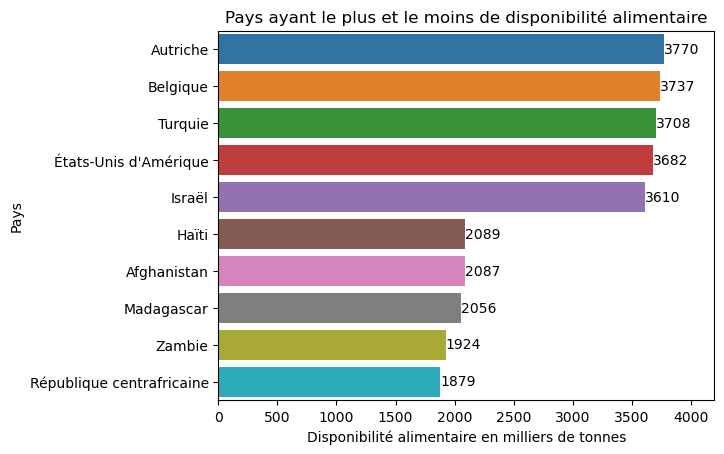

In [70]:
graphique = sns.barplot(data=g_3, x='Disponibilité alimentaire (Kcal/personne/jour)', y=g_3.index, ci=None, estimator=np.sum)

#Ajout d'un titre
plt.title("Pays ayant le plus et le moins de disponibilité alimentaire")

#Modification du nom des axes
plt.xlabel('Disponibilité alimentaire en milliers de tonnes')
plt.ylabel('Pays')


#Ajout des valeurs pour chaque pays
graphique.bar_label(graphique.containers[0])

#Imposition des limites de l'axe X
plt.xlim(0,4200)